# La simulation *pas à pas*

Nous ne verrons ici que le début du sujet car il faudrait bien plus de temps pour aborder ce domaine. Vous le ferez surement dans le futur.

Reprenons le dernier exercice comme exemple :

*Un avions lâche une caisse de matériel d'une altitude $H$ et une vitesse initiale horizontale $\vec{v_0}$. Nous allons étudier la trajetoire de la caisse.*

<img src="http://lappweb.in2p3.fr/~maurin/expl201/largage.png" alt="drawing" width="400"/>

*On prendra $H=10000\,$m, $g=9.81\,$m.s$^{-2}$ et $v_0=100\,$m.s$^{-1}$*


Le code ci-dessous affiche les données du fichier *chute.bin* avec quelques petits cosmétiques supplémentaires. 

In [1]:
# Ici on charge les données
import pickle

fichier = open("fichiers/chute.bin","rb")

data_x = pickle.load(fichier)
data_z = pickle.load(fichier)

fichier.close()


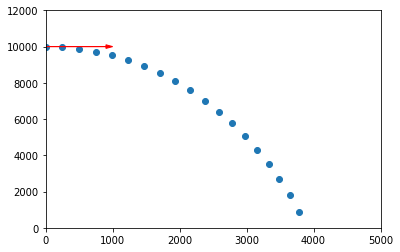

In [4]:
# Ici on affiche les données
import matplotlib.pyplot as plt

fig, ax = plt.subplots() 
ax.set_xlim((0, 5000))
ax.set_ylim((0, 12000))
#ax.set_aspect('equal') # Permet de faire que l'echelle des x et des z soient les mêmes

plt.arrow(0, 10000, 1000, 0, head_width=200.00, head_length=100.0, fc='r', ec='r', length_includes_head = True)

plt.scatter(data_x,data_z)
plt.show()

La flèche représente visuellement la vitesse initiale.

-----

Faire une **simulation**, c’est calculer et représenter les différents états successifs de l’évolution d’un modèle (représentant un système physique ou biologique ou ...) au cours du temps. 

Nous allons ainsi partir d'un état initial et faire avancer le temps par petit *pas* ($\delta t$) en faisant un certain nombre d'hypothèses et de calculs.

Pour notre situation, nous avons déjà l'état initial :

- $t=0$
- $x(0) = 0$
- $z(0) = H$
- $v_x(0) = v_0$
- $v_z(0) = 0$
- $a_x(0) = 0$
- $a_z(0) = -g$

Il faut maintenant trouver le moyen de faire *"avancer le temps"*. Mais comment ? 

----

**Grâce au développement de Taylor !!!!** 

En effet, si nous prenons $\delta t$ très petit, on peut toujours écrire à l'ordre 1 que :

<div align="center">  $f(t+\delta t) = f(t) + \frac{df(t)}{dt}\,\delta t$ </div>

Appliqué à $x(t)$ cela donne : 

<div align="center"> $x(t+\delta t) = x(t) + \frac{dx(t)}{dt}\,\delta t $ </div>

Mais nous savons aussi que $\frac{dx(t)}{dt}=v_x(t)$, d'où :
<div align="center"> $x(t+\delta t) = x(t) + v_x(t)\,\delta t $ </div>

Nous voyons ici que l'on peut calculer le temps (*pas*) $t+\delta$ si l'on connaît les conditions au temps (*pas*) précédent $t$.


Appliquons cela à $t=0$ pour calculer la position $x$ au temps $\delta t$ :
<div align="center"> $x(\delta t) = x(0) + v_x(0)\,\delta t$ </div>

Si vous regardez la situation initiale, nous avons tout ce qu'il faut pour faire ces calculs. Il est donc possible à partir des conditions à l'instant $t=0$ de calculer la position à l'instant $\delta t$.

Notez également qu'il est possible d'appliquer le développement de Taylor aux autres paramètres comme $z(t)$, $v_x(t)$ et $v_z(t)$ :
<div align="center"> $v_x(t+\delta t) = v_x(t) + \frac{dv_x(t)}{dt}\,\delta t = v_x(t) + a_x(t)\,\delta t$ </div>

____

**Passons à la partie code.** En informatique, il est impossible d'écrire directement $x(\delta t)$ ou $x(t+\delta t)$. Cela n'a pas de sens. Nous allons donc utiliser une liste pour $x(t)$ :

- Le premier élément de la liste correspondra à $t=0$
- Le deuxième à $t=\delta t$
- Le troisième à $t=2\times\delta t$
- Le $n^{ème}$ à $t=n\times\delta t$

Le développement de Taylor permet alors de lié l'élément $n+1$ à l'élément précédent $n$ :
<div align="center"> `x[n+1] = x[n] + vx[n] * DeltaT` </div>
<div align="center"> `vx[n+1] = vx[n] + ax[n] * DeltaT`   </div>

Voyons comment nous pouvons écrire en *python* le calcule de `x[1]`, `vx[1]` et `ax[1]`:

In [7]:
# On definit notre pas de temps (nous verrons plus tard son influence):
DeltaT = 0.1

# Ainsi que la taille des listes :
nb = 10

# Initialisation des listes qui contiendront les temps, les positions, les vitesses...
t = [0] * nb
x = [0] * nb
vx = [0] * nb
ax = [0] * nb

# Dans le premier élément on place les paramètres initiaux
t[0] = 0 
x[0] = 0
vx[0] = 100
ax[0] = 0

# On applique la formule de Taylor pour calculer la valeur après un pas de temps (DeltaT) :
t[1] = t[0] + DeltaT                 # le temps a avancé d'un pas
x[1] = x[0] + vx[0] * DeltaT         # Position en x
vx[1] = vx[0] + ax[0] * DeltaT       # vitesse en x
ax[1] = 0                            # accélération en x (ici nulle).

#Vérifions le résultat :
print("La position x apres un pas : ",x[1])
print("La vitesse vx apres un pas : ",vx[1])

('La position x apres un pas : ', 10.0)
('La vitesse vx apres un pas : ', 100.0)


Naturellement, nous n'allons pas calculer la suite à la main. Nous allons utiliser une boucle.

## Exercice 1 :  Ecrire la boucle pour faire avancer le temps

1) Reprener le code précédent et placer le dans une boucle pour faire avancer le temps.

2) Ajouter proprement le calcul de $z$, $v_z$ et $a_z$.

3) Afficher la trajectoire (`z` en fonction de `x`). Comparer aux données. 

4) Tester différentes valeurs de `DeltaT`. Quel influence à ce paramètre ?

## Exercice 1 suite : forces de frottement

Dans la simulation précédente, nous avons considéré qu'il n'y avait que le poids. Vous savez bien que cela est faux. On va donc ajouter la force de frottements visqueux : $\vec{f} = -h\,\vec{v}$.

Que faut-il changer dans notre simulation ? En réalité, pas grand chose. **Les développements de Taylor restent justes**. Il ne faut donc que calculer proprement l'accélération $a_x$ et $a_z$ en prenant compte cette nouvelle force.

1) Ajouter la force de frottement à la simulation précédente

2) Chercher un cefficient $h$ qui correspond à peu prêt aux données. Tester pour cela des valeurs de 10 en 10 (ex: 10, 1, 0.1....)

## Problème 1 : 

Dans ce problème nous allons simuler la trajectoire d'un satellite autour de la Terre. Le satellite par avec une vitesse $\vec{v_0}$ selon l'axe des $x$ (voir schéma ci-dessous).

Afin de simplifier nos développements informatiques, le code sera divisé en 3 parties distinctes :

- les imports et les définitions
- la simulation avec l'initialisation des listes et la boucle pour faire avancer le temps
- l'affichage des résultats

Les trois onglets sont déjà créés avec plusieurs petites choses dedans. 

1) Regarder le code et executer le.



In [3]:
## IMPORT ET DEFINITIONS DE DONCTION
import matplotlib.pyplot as plt



In [4]:
## INITIALISATION ET SIMULATION PAS A PAS
H = 50000 # altitude initiale du satellite
v0 = 10 # vitesse horizontale initiale en km.h-1


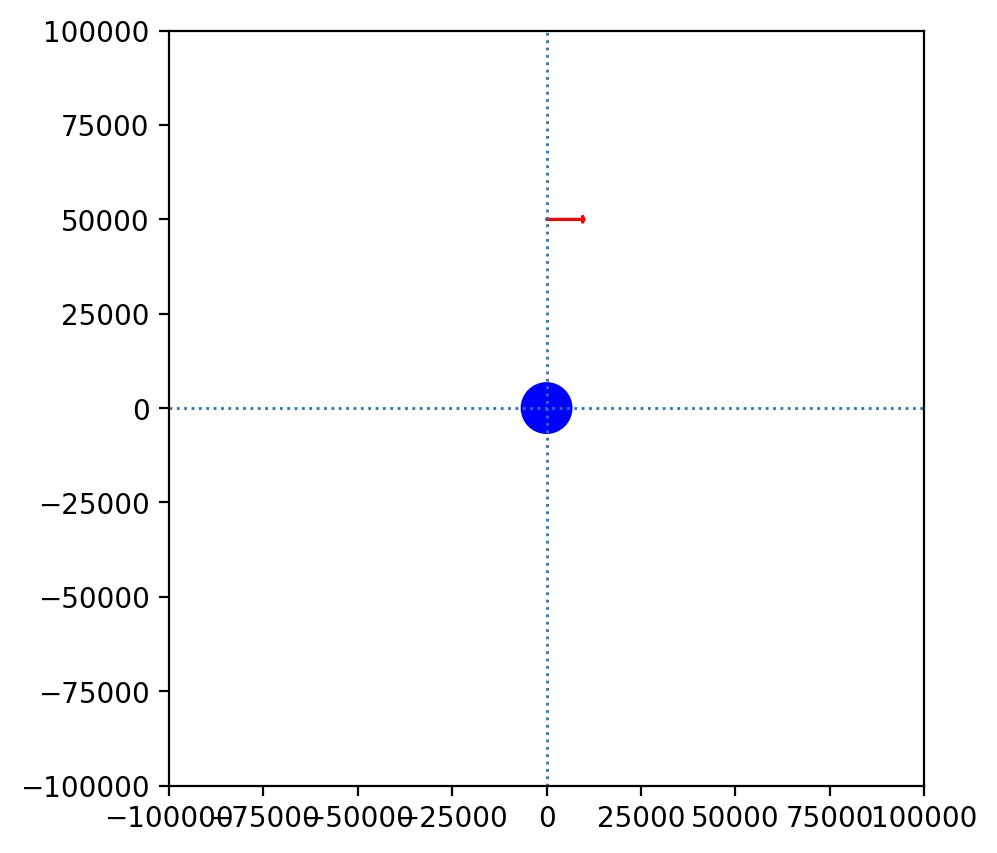

In [5]:
## AFFICHAGE DES RESULATS
xmax = 100000
ymax = 100000
xmin = -100000
ymin = -100000

# Ici crée un axe vide :
fig, ax = plt.subplots(figsize=(5, 5), dpi=200) 
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
ax.set_aspect('equal') # Permet de faire que l'echelle des x et des z soient les mêmes

# Ajout d'une flèche qui donne la position et la direction initiales du satellite
plt.arrow(0, H, v0*1000, 0, head_width=2000.00, head_length=500.0, fc='r', ec='r', length_includes_head = True)

# Ajout des lignes horizontales et verticales
line = plt.Line2D((0,-0),(ymin,ymax), linestyle=':',linewidth=1)
ax.add_artist(line)
line2 = plt.Line2D((xmin,xmax),(0,0), linestyle=':',linewidth=1)
ax.add_artist(line2)

# Ajout d'un cercle qui représente la Terre
Terre = plt.Circle((0, 0), 6500, color='b')
ax.add_artist(Terre)

# AJOUTER ICI LA TRAJECTOIRE DE VOTRE SATELLITE


# Generation du dessin
plt.show()

Passons à la physique. Si l'on néglige les frottements dans l'espace, un satellite proche de la Terre n'est soumis qu'à une seule force : l'attraction de la Terre. Cette force est données par :

<div align="center"> $\vec{F} = - G\,\frac{m\,M}{d^2} \vec{u_{T\rightarrow S}}$ </div>

Avec :
* $d$ la distance Terre -> Satellite
* $G$ la constante universelle de la gravitation : $6.67408\times10^{−11}\,m^3\,kg^{−1}\,s^{−2}$
* $M$ la masse de la Terre : $5.972 \times 10^{24}\,kg$
* $m$ la masse du satellite
* $\vec{u_{T\rightarrow S}}$ un vecteur unitaire allant de la Terre vers le satellite


2) Ecrire une fonction informatique qui retourne les valeurs de l'accélération du satellite ($a_x$ et $a_z$) en fonction de la position du satellite ($x$ et $z$). On utilisera bien sûr le principe fondamentale de la dynamique. Faites attention aux unitées.

3) En vous inspirant de l'exercice précédent, écrire un code qui simule *pas à pas* la trajectoire du satellite.

4) Afficher le résultat sur le dessin

5) En modifiant les conditions initiales, déterminer la vitesse minimale qu'il faut au niveau de la Terre pour que le satellite ne revienne pas sur Terre. On appelle cette vitesse minimale, la vitesse de libération.